Experiment 01 - Skin Color Detection

In [1]:
#Import all necessary libraries

import imageio
import matplotlib.pyplot as plt
import numpy as np

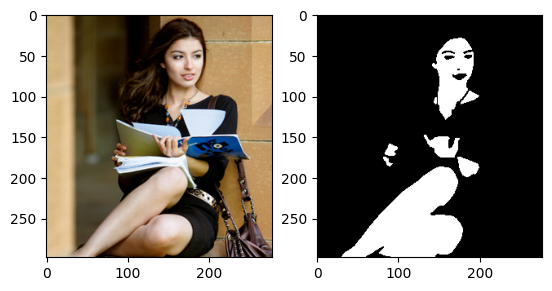

In [2]:
# Load two images using imageio and display them side by side using matplotlib.

f = imageio.v2.imread("/content/01_0520962400.jpg")  # Load the first image.
m = imageio.v2.imread("/content/02_0520962400.png")  # Load the second image.

# Create a side-by-side comparison of the two images.
plt.subplot(121)  # Create the first subplot for the first image.
plt.imshow(f)     # Display the first image.
plt.subplot(122)  # Create the second subplot for the second image.
plt.imshow(m)     # Display the second image.

plt.show()  # Render and show the plot.

In [3]:
# Extract pixel values corresponding to specific regions (e.g., skin-colored regions) based on a condition in the second image (mask).

skincolors = f[m[:, :, 0] == 255]  # Select pixels from 'f' where the red channel in 'm' equals 255.
print(skincolors.shape)  # Print the shape of the resulting array to understand its dimensions.

(13636, 3)


In [4]:
# Extract pixel values corresponding to non-skin regions based on the condition in the mask.

nonskincolors = f[m[:, :, 0] == 0]  # Select pixels from 'f' where the red channel in 'm' equals 0.
print(nonskincolors.shape)  # Print the shape of the resulting array to understand its dimensions.

(68910, 3)


In [5]:
# Combine skin and non-skin pixel data into a single dataset, and create corresponding labels for classification (1 for skin, 0 for non-skin).

color = np.vstack((skincolors, nonskincolors))  # Stack skin and non-skin pixel values vertically into one array.
target = np.concatenate((np.ones(len(skincolors)), np.zeros(len(nonskincolors))))  # Create labels: 1 for skin, 0 for non-skin.

In [6]:
# Train a logistic regression classifier using skin and non-skin pixel data.
# Split the data into training and testing sets for model evaluation.

from sklearn.linear_model import LogisticRegressionCV

learn_color = color[1::2]  # Use every second row of 'color' as the training data.
test_color = color[0::2]   # Use the remaining rows as the testing data.
learn_target = target[1::2]  # Corresponding training labels.
test_target = target[0::2]   # Corresponding testing labels.

logregr = LogisticRegressionCV()  # Initialize logistic regression with cross-validation.
logregr.fit(learn_color, learn_target)  # Train the model on the training data.

LogisticRegressionCV()

In [7]:
# Evaluate the performance of the trained logistic regression model using the testing data.

logregr.score(test_color, test_target)  # Calculate and return the accuracy score of the model.

0.9107406779250358

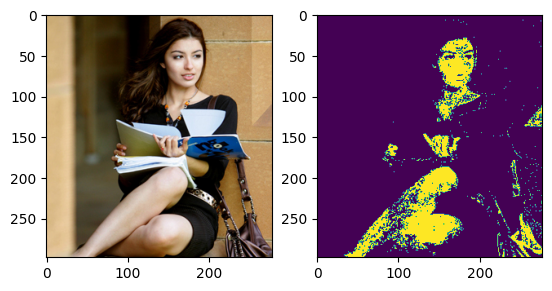

In [8]:
# Predict skin regions in the image using the trained logistic regression model and visualize the results.

image_colors = f.reshape((-1, 3))  # Reshape the image into a 2D array where each row is a pixel (R, G, B).
predict_skin = logregr.predict(image_colors).reshape(f.shape[:2])  # Predict skin regions and reshape back to the image size.

plt.subplot(121)  # Create the first subplot for the original image.
plt.imshow(f)  # Display the original image.

plt.subplot(122)  # Create the second subplot for the skin prediction mask.
plt.imshow(predict_skin)  # Display the predicted skin mask.

plt.show()  # Render and display both subplots.

Experiment 02 - Image Mosaic (Image Stitching)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import warp

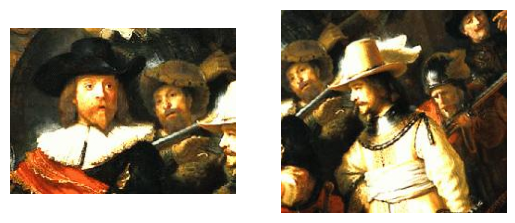

In [10]:
# Importing the first image and normalizing pixel values to the range [0, 1]
f1 = plt.imread('/content/nachtwacht1.jpg') / 255
# Creating a subplot in a 1x2 grid, selecting the first subplot for the first image
plt.subplot(121)
# Displaying the first image
plt.imshow(f1)
# Removing the axis for the first subplot
plt.axis('off')

# Importing the second image and normalizing pixel values to the range [0, 1]
f2 = plt.imread('/content/nachtwacht2.jpg') / 255
# Creating a subplot in a 1x2 grid, selecting the second subplot for the second image
plt.subplot(122)
# Displaying the second image
plt.imshow(f2)
# Removing the axis for the second subplot
plt.axis('off')

# Displaying both subplots
plt.show()

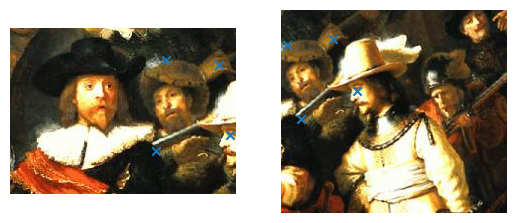

In [11]:
# Coordinates of points in the left image
xy = np.array([[157, 32],   # Point 1 (x, y)
               [211, 37],   # Point 2 (x, y)
               [222, 107],  # Point 3 (x, y)
               [147, 124]]) # Point 4 (x, y)

# Coordinates of corresponding points in the right image
xaya = np.array([[6, 38],   # Point 1 (x', y')
                 [56, 31],  # Point 2 (x', y')
                 [82, 87],  # Point 3 (x', y')
                 [22, 118]]) # Point 4 (x', y')

# Displaying the left image
plt.subplot(121)  # Create the first subplot in a 1x2 grid
plt.imshow(f1)    # Show the left image
plt.axis('off')   # Turn off the axis display
plt.scatter(xy[:, 0], xy[:, 1], marker='x')  # Plot the points on the left image

# Displaying the right image
plt.subplot(122)  # Create the second subplot in a 1x2 grid
plt.imshow(f2)    # Show the right image
plt.axis('off')   # Turn off the axis display
plt.scatter(xaya[:, 0], xaya[:, 1], marker='x')  # Plot the points on the right image

# Display both subplots
plt.show()

[[ 1.01685498e+00  3.12932553e-01 -1.63082057e+02]
 [-2.17037452e-01  9.92701412e-01  4.39692054e+01]
 [ 4.93917724e-04  5.87218302e-04  1.00000000e+00]]


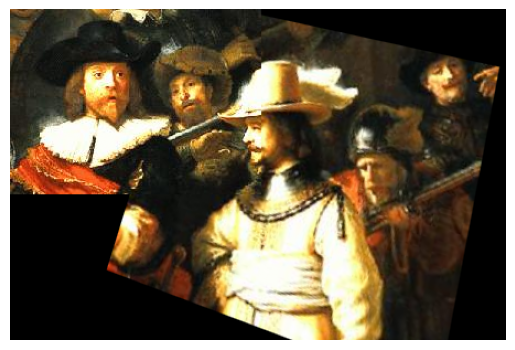

In [12]:
import cv2
from skimage.transform import warp

# Compute the perspective transform matrix (P) from the points in the left image (xy) to the points in the right image (xaya)
P = cv2.getPerspectiveTransform(xy.astype(np.float32), xaya.astype(np.float32))
print(P)  # Printing the perspective transformation matrix for reference

# Apply the perspective transformation to the second image (f2) using the transformation matrix (P)
# The 'output_shape' parameter defines the size of the output image
f_stitched = warp(f2, P, output_shape=(300, 450))

# Get the dimensions of the first image (f1)
M, N = f1.shape[:2]

# Overlay the first image (f1) onto the transformed second image (f_stitched)
# The first image is placed in the region corresponding to its original size
f_stitched[0:M, 0:N, :] = f1

# Display the stitched image
plt.imshow(f_stitched)  # Show the stitched image
plt.axis('off')         # Hide the axis
plt.show()              # Display the result

Experiment 03 - Histogram Equalization and Linear Filtering

Histogram Equalization

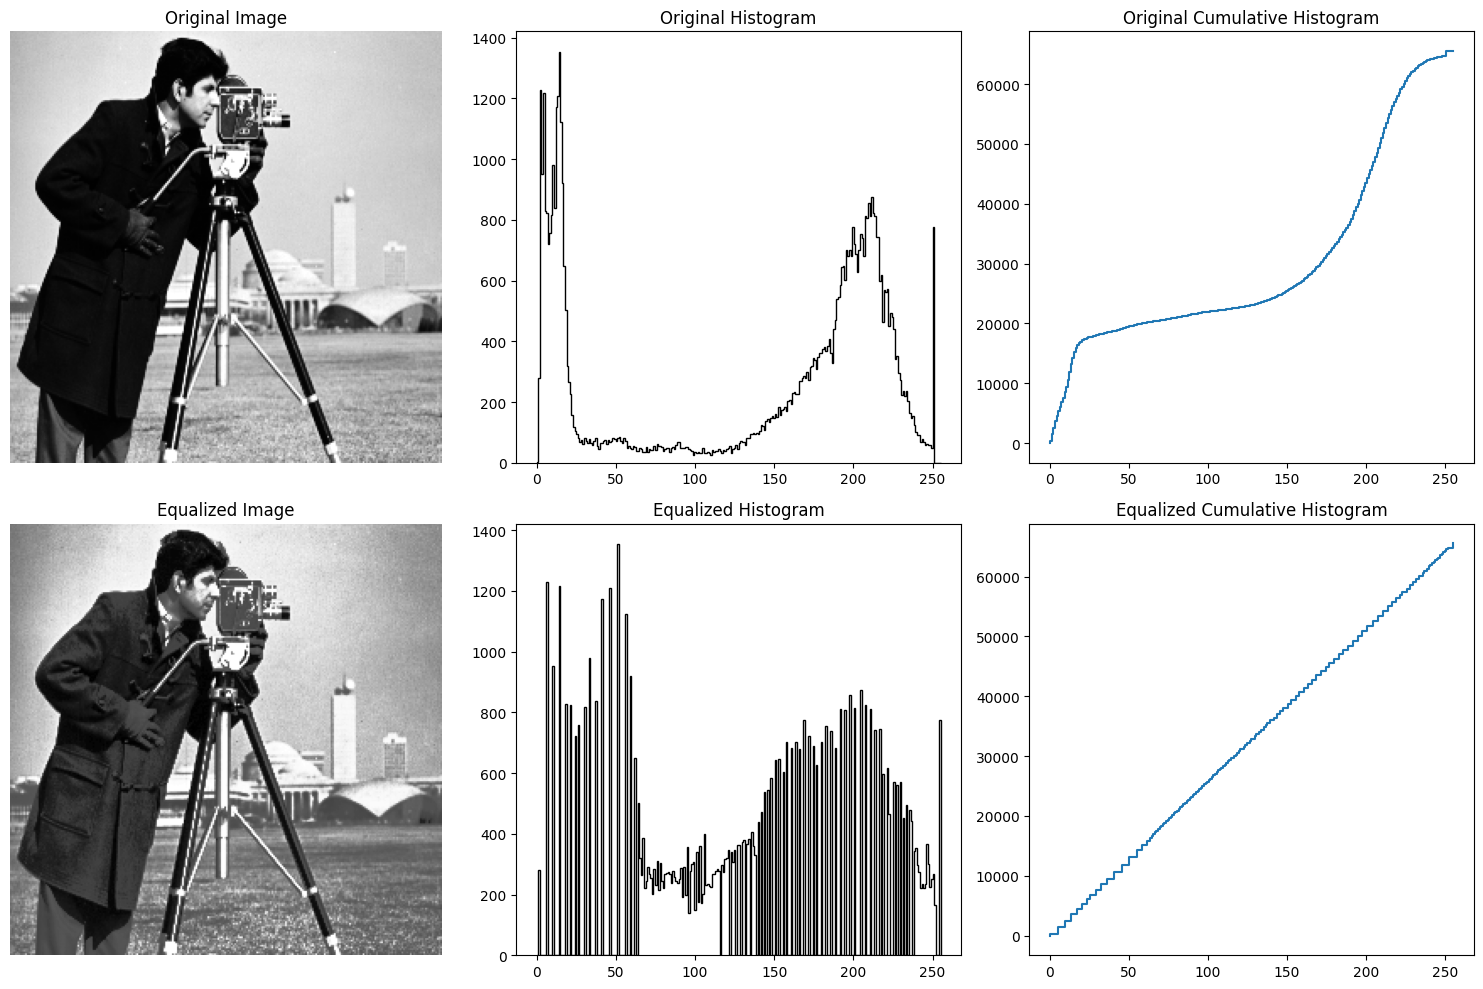

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function for histogram equalization using OpenCV
def histogram_equalization_opencv(image):
    # Convert the image to grayscale (if it is a color image)
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply histogram equalization using OpenCV
    equalized_image = cv2.equalizeHist(image)

    return equalized_image

# Load the image (ensure it is in the range [0, 255] for 8-bit images)
image = cv2.imread('/content/cameraman.png', cv2.IMREAD_GRAYSCALE)  # Example image (use your own path)

# Apply histogram equalization
equalized_image = histogram_equalization_opencv(image)

# Plot the original and equalized image along with their histograms
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Original image and its histogram
axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')
axs[0, 1].hist(image.flatten(), bins=256, range=(0, 255), color='black', histtype='step')
axs[0, 1].set_title('Original Histogram')
axs[0, 2].step(np.arange(256), np.cumsum(np.histogram(image.flatten(), bins=256, range=(0, 255))[0]), where='mid')
axs[0, 2].set_title('Original Cumulative Histogram')

# Equalized image and its histogram
axs[1, 0].imshow(equalized_image, cmap='gray')
axs[1, 0].set_title('Equalized Image')
axs[1, 0].axis('off')
axs[1, 1].hist(equalized_image.flatten(), bins=256, range=(0, 255), color='black', histtype='step')
axs[1, 1].set_title('Equalized Histogram')
axs[1, 2].step(np.arange(256), np.cumsum(np.histogram(equalized_image.flatten(), bins=256, range=(0, 255))[0]), where='mid')
axs[1, 2].set_title('Equalized Cumulative Histogram')

plt.tight_layout()
plt.show()

Linear Filtering

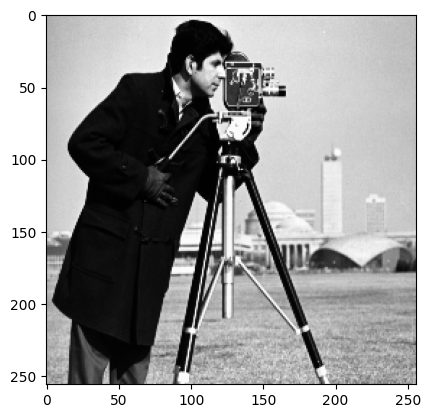

In [14]:
from pylab import *

a = imread("/content/cameraman.png")

clf(); imshow(a,vmin=0,vmax=1,cmap=cm.gray)

(0.0, 1.0)

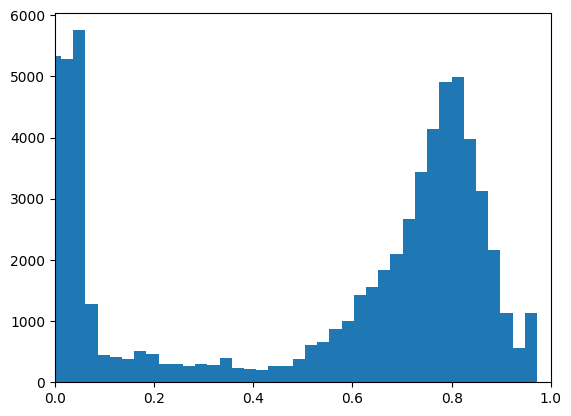

In [15]:
h, be = histogram(a.flatten(), bins=40)

clf(); bar( be[0:-1], h, width=diff(be)[0] ); xlim( (0,1) )

<ipython-input-16-1daeb7cc296d>:22: DeprecationWarning: Please import `zoom` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.interpolation import zoom


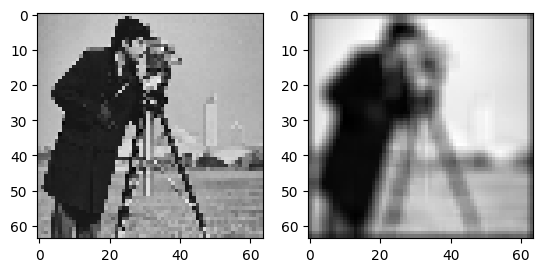

In [16]:
def linfilter1(f, w):
  g = empty(f.shape, dtype=f.dtype)
  M,N = f.shape
  K,L = (array(w.shape)-1)//2

  def value(i,j):
    """The function returning the value f[i,j] in case
    (i,j) in an index 'in the image', otherwise it return 0"""
    if i<0 or i>=M or j<0 or j>=N:
      return 0
    return f[i,j]

  for j in range(N):
    for i in range(M):
      summed = 0
      for k in range(-K,K+1):
        for l in range(-L,L+1):
          summed += value(i+k,j+l) * w[k+K,l+L]
      g[i,j] = summed
  return g

from scipy.ndimage.interpolation import zoom
from pylab import *; rcParams['savefig.bbox'] = 'tight'

a = imread('/content/cameraman.png')

f = zoom(a, 0.25)

g = linfilter1(f, ones((5,5))/25)

subplot(1,2,1)
imshow(f); gray()
subplot(1,2,2)
imshow(g)

<ipython-input-17-064b247331db>:15: DeprecationWarning: Please import `zoom` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.interpolation import zoom


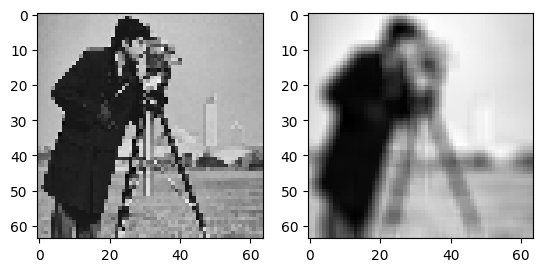

In [17]:
def linfilter2(f, w):
  """Linear Correlation based on neigborhood processing without loops"""
  g = empty(f.shape, dtype=f.dtype)
  M,N = f.shape
  K,L = (array(w.shape)-1)//2

  for j in range(N):
    for i in range(M):
      ii = minimum(M-1, maximum(0, arange(i-K, i+K+1)))
      jj = minimum(N-1, maximum(0, arange(j-L, j+L+1)))
      nbh = f[ ix_(ii,jj) ]
      g[i,j] = ( nbh * w ).sum()
  return g

from scipy.ndimage.interpolation import zoom
from pylab import *; rcParams['savefig.bbox'] = 'tight'

a = imread('/content/cameraman.png')

f = zoom(a, 0.25)

g = linfilter2(f, ones((5,5))/25)

subplot(1,2,1)
imshow(f); gray()
subplot(1,2,2)
imshow(g)

<ipython-input-18-e9b77b5b44f8>:20: DeprecationWarning: Please import `zoom` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.interpolation import zoom


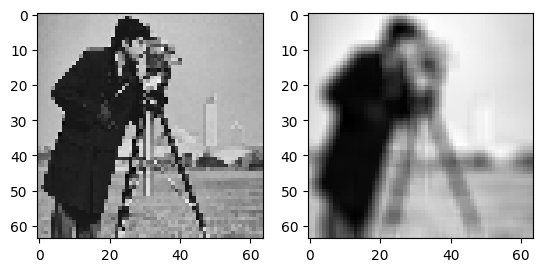

In [18]:
def linfilter3(f, w):
  """Linear Correlation using Translates of Images"""

  M,N = f.shape
  K,L = (array(w.shape)-1)//2

  di,dj = meshgrid(arange(-L,L+1), arange(-K,K+1))
  didjw = zip( di.flatten(), dj.flatten(), w.flatten() )

  def translate(di,dj):
    ii = minimum(M-1, maximum(0, di+arange(M)))
    jj = minimum(N-1, maximum(0, dj+arange(N)))
    return f[ ix_(ii, jj) ]

  r = 0*f;
  for di, dj, weight in didjw:
    r += weight*translate(di,dj)
  return r

from scipy.ndimage.interpolation import zoom
from pylab import *; rcParams['savefig.bbox'] = 'tight'

a = imread('/content/cameraman.png')

f = zoom(a, 0.25)

g = linfilter3(f, ones((5,5))/25)

subplot(1,2,1)
imshow(f); gray()
subplot(1,2,2)
imshow(g)